In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### EDA

In [107]:
data=pd.read_csv('data/winequality.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [108]:
value_counts = data['quality'].value_counts()
print(value_counts)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [109]:
data.shape

(6497, 13)

In [110]:
data.size

84461

In [111]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [112]:
data['type'].fillna(data['type'].mode()[0], inplace=True)
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)
data['pH'].fillna(data['pH'].mean(), inplace=True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)

In [113]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [114]:
data.duplicated().sum()

1168

In [115]:
data.drop_duplicates(inplace=True)

In [116]:
data.duplicated().sum()

0

### Detect outlier using boxplot

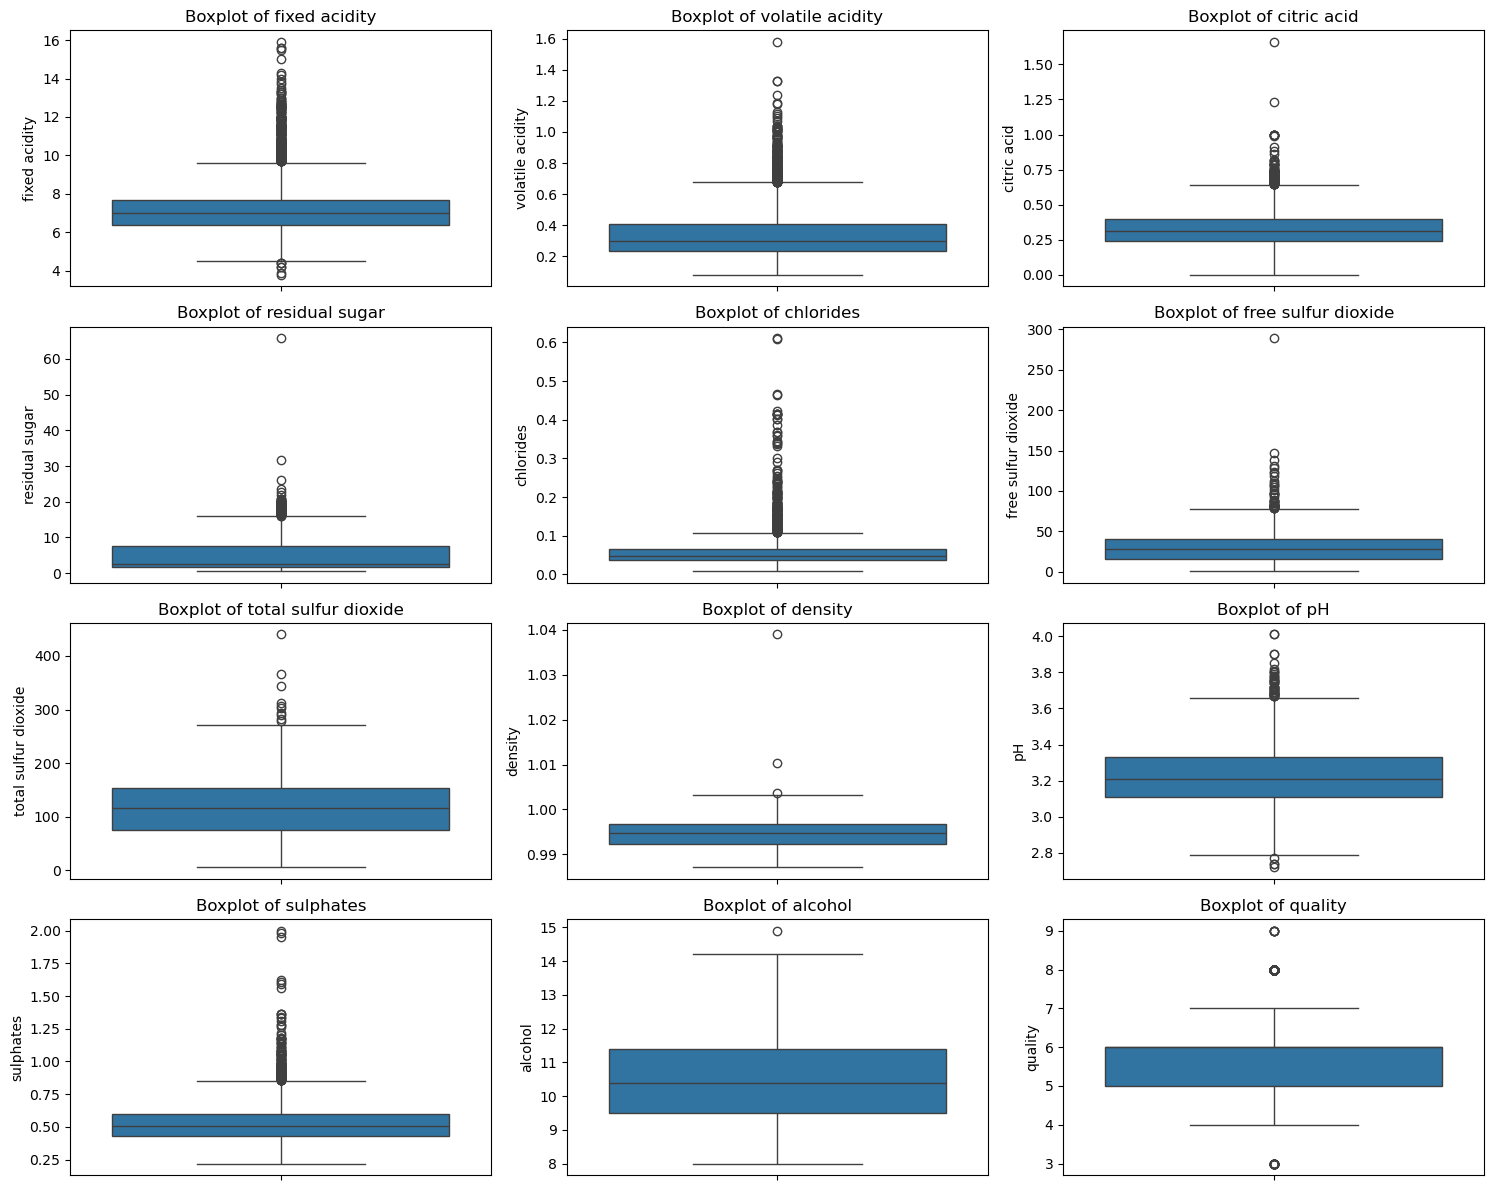

In [118]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### IQR

In [120]:
#Detect outlier using IQR
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)] #outliers
    print(f"Outliers detected in '{column}' column:\n", outliers, "\n")
    
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


print("Data after removing outliers:\n", data)

Outliers detected in 'fixed acidity' column:
        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
98    white            9.8              0.36         0.46           10.50   
169   white            9.8              0.42         0.48            9.85   
207   white           10.2              0.44         0.88            6.20   
358   white           10.0              0.20         0.39            1.40   
873   white           10.3              0.17         0.47            1.40   
...     ...            ...               ...          ...             ...   
6352    red           11.7              0.45         0.63            2.20   
6368    red           10.0              0.69         0.11            1.40   
6372    red            9.9              0.50         0.50           13.80   
6441    red           11.1              0.44         0.42            2.20   
6446    red           11.2              0.40         0.50            2.00   

      chlorides  free sulfur 

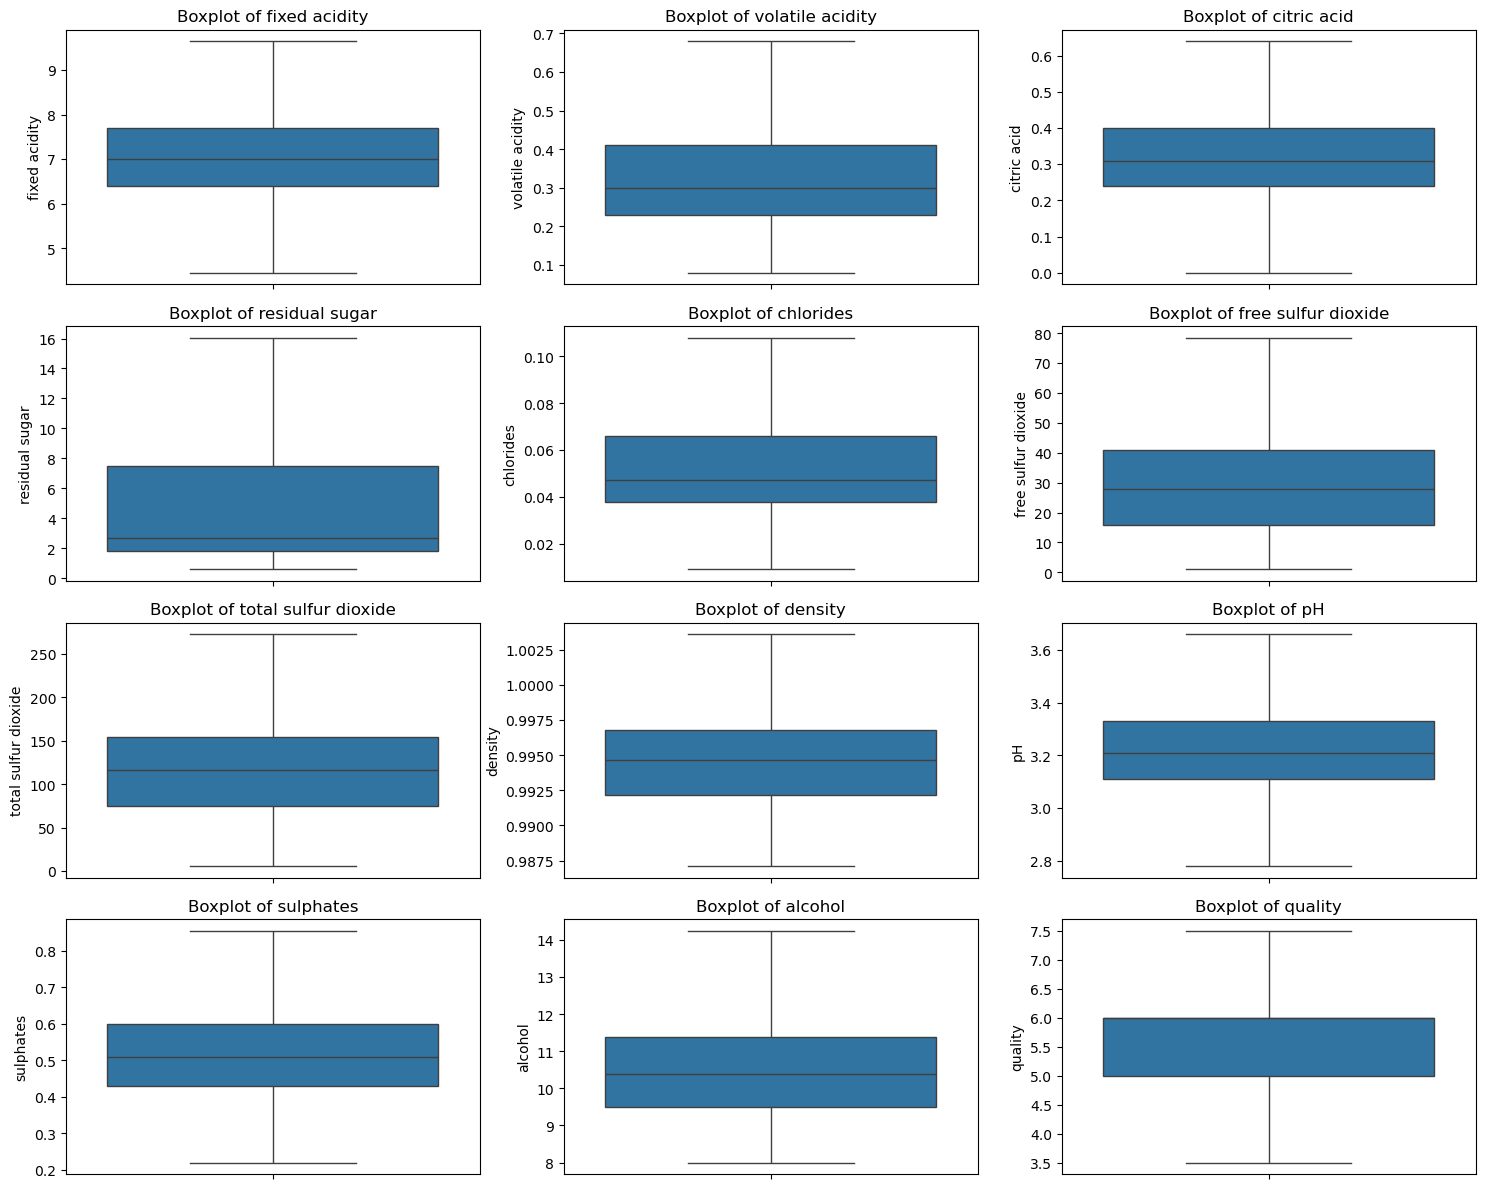

In [121]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [122]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,16.05,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0


### Encoding

In [124]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [125]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

In [126]:
data.dtypes

type                      int32
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

### Splitting X & Y

In [209]:
data.dtypes


type                      int32
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [211]:
data['quality']=data['quality'].astype(int)

In [213]:
data.dtypes

type                      int32
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [215]:
X = data.drop(columns=['quality', 'type'])
y = data['quality']

In [217]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,16.05,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


### Scaling

In [220]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

### Splitting into test data and train data

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [241]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.5712945590994372
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        45
           5       0.64      0.62      0.63       359
           6       0.53      0.69      0.60       455
           7       0.56      0.36      0.44       199

    accuracy                           0.57      1066
   macro avg       0.35      0.33      0.33      1066
weighted avg       0.55      0.57      0.55      1066

Confusion Matrix:
 [[  0   0   5   3   0]
 [  0   0  23  21   1]
 [  0   0 224 132   3]
 [  0   0  90 314  51]
 [  0   0  10 118  71]]


### Random forest classifier

In [231]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.5769230769230769
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       1.00      0.02      0.04        45
           5       0.62      0.61      0.61       359
           6       0.54      0.68      0.60       455
           7       0.62      0.44      0.51       199

    accuracy                           0.58      1066
   macro avg       0.56      0.35      0.35      1066
weighted avg       0.60      0.58      0.56      1066

Confusion Matrix:
 [[  0   0   4   4   0]
 [  0   1  27  17   0]
 [  0   0 219 137   3]
 [  0   0  96 308  51]
 [  0   0   8 104  87]]


### Support Vector Classifier (SVC)

In [234]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\nSupport Vector Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))



Support Vector Classifier
Accuracy: 0.5834896810506567
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        45
           5       0.65      0.61      0.63       359
           6       0.54      0.72      0.62       455
           7       0.63      0.37      0.47       199

    accuracy                           0.58      1066
   macro avg       0.36      0.34      0.34      1066
weighted avg       0.57      0.58      0.56      1066

Confusion Matrix:
 [[  0   0   5   3   0]
 [  0   0  26  19   0]
 [  0   0 219 138   2]
 [  0   0  84 329  42]
 [  0   0   4 121  74]]


### KNN

In [237]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN)
Accuracy: 0.5206378986866792
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.37      0.16      0.22        45
           5       0.56      0.62      0.59       359
           6       0.50      0.54      0.52       455
           7       0.50      0.41      0.45       199

    accuracy                           0.52      1066
   macro avg       0.39      0.34      0.35      1066
weighted avg       0.51      0.52      0.51      1066

Confusion Matrix:
 [[  0   1   3   4   0]
 [  0   7  18  18   2]
 [  0   4 222 124   9]
 [  1   6 133 245  70]
 [  0   1  21  96  81]]


In [239]:
#END